# Intro

This is an exploratory data analysis for a small project of mine, which samples the "About us" sections of companies in the S&P 500.

My goal is to use some of the tools I learned in this course: https://www.coursera.org/learn/twitter-sentiment-analysis/home/week/1

However, unlike in that course, I don't have any label (yet) that I am trying to model. Instead, my goal is to try unsupervised learning methods such as k-means clustering. My original inspiration was to investigate the idea of different types of "company cultures" and to see if I could quantify the differentiation of different company cultures from the about us sections of company websites. My anticipation is that I will instead find differentiation into different industries based on the words found.

Link to a source on k-means clustering: https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means/tutorial

Some possible future expansions:
* Add more features to the data
 * Which Industries the companies are in
 * Company size (number of employees)
 * Company evalution

A cleaner source of data for the "about us" information could be the companies "About us" section in their LinkedIn profile. Accessing this would require manually downloading 500 sites, accessing the LinkedIn API, or using a more advanced web browser tool 




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/companyaboutus/CompanyCultures.tsv


In [2]:
about_data = pd.read_table('../input/companyaboutus/CompanyCultures.tsv')

In [3]:
# Note: the first version of the table doesn't have labels
# this may be fixed in a later version of the data
about_data = about_data.set_axis(['Symbol', 'Name', 'Website', 'AboutUs'], axis=1, copy=False)

In [4]:
about_data.dropna(inplace=True)
about_data.head(2)

,Symbol,Name,Website,AboutUs
0,ACN,Accenture,https://www.accenture.com,JOIN US EXPLORE JOBS WHO WE ARE HOW WE'RE ORGA...
1,ATVI,Activision Blizzard,https://activisionblizzard.com/,About We connect and engage the world through ...


In [5]:
about_data.shape

(65, 4)

Currently, this set includes 65 companies, out of a total of 500 S&P 500 companies. The missing companies may be filled in with improvements to workflow grabbing the data from websites.

In [6]:
print(about_data.columns)

Index(['Symbol', 'Name', 'Website', 'AboutUs'], dtype='object')


In [7]:
!pip install wordcloud

In [8]:
# all text
# sentences = tweets_df['tweet'].tolist()
# sentences_as_one_string =" ".join(sentences)
all_text_list = about_data['AboutUs'].tolist()
print(type(all_text_list))
print(type(all_text_list[0]))
print(all_text_list[0])
# Some entries may have been encoded as strings
for item in all_text_list:
    #print(type (item))
    if type(item) is float:
        print(item)

all_text = " ".join(all_text_list)

<class 'list'>
<class 'str'>
JOIN US EXPLORE JOBS WHO WE ARE HOW WE'RE ORGANIZED IN THE U.S. Current Country: United States   She also serves on the WEF Board of Trustees.                      Part case study, part living lab, our flagship New York Innovation Hub has been designed for                     collaboration, celebration, community and co-creation with clients.                                             Accenture employees worldwide                                                 Clients served across more than 120 countries                                                 Patents and patents pending worldwide                                                     Envisioning and executing change at speed and scale.                                                       Accelerating change across your enterprise to create lasting value.                                                       Creating intelligent new ways to embrace change and grow.                                  

In [9]:
from wordcloud import WordCloud

#plt.figure(figsize=(20,20))
#plt.imshow(WordCloud().generate(sentences_as_one_string))

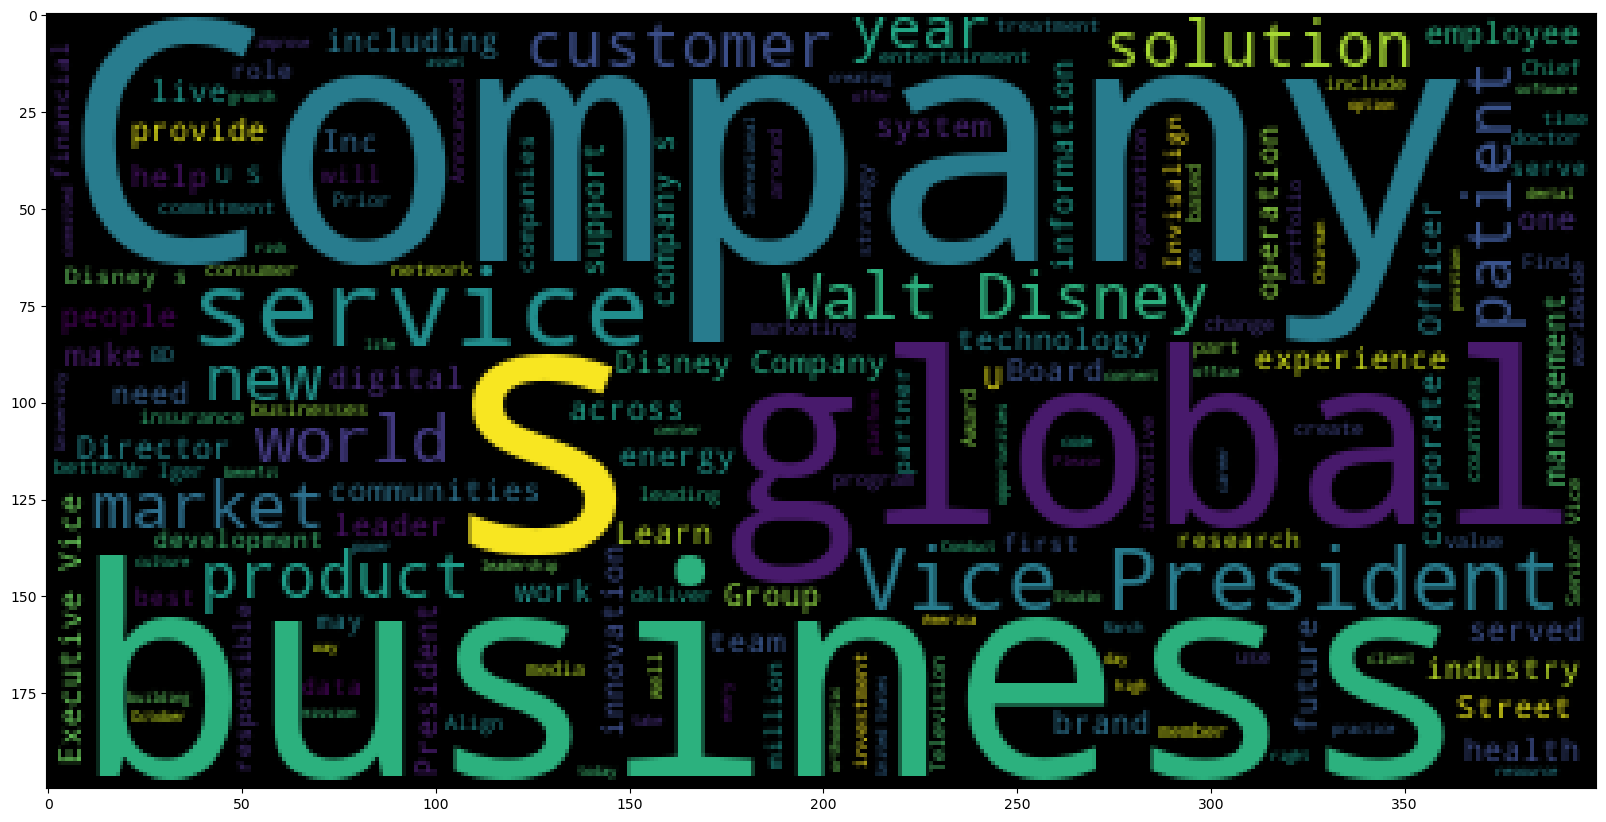

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(all_text))

# Clean up the text with String and StopWords
## String

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
# Test = '$I love AI & Machine learning!!'
#Test_punc_removed = [char for char in Test if char not in string.punctuation]
#Test_punc_removed_join = ''.join(Test_punc_removed)
#Test_punc_removed_join

In [13]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
#stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Pipeline for cleaning punctuation and stop words
def text_cleaning(text):
    Text_punc_removed = [char for char in text if char not in string.punctuation]
    Text_punc_removed_string = ''.join(Text_punc_removed)
    Text_clean = [word for word in Text_punc_removed_string.split() if word.lower() not in stopwords.words('english')]
    return Text_clean


about_data['AboutUsCleaned'] = about_data['AboutUs'].apply(text_cleaning)
about_data['AboutUsCleaned'].head(5)

0    [JOIN, US, EXPLORE, JOBS, ORGANIZED, US, Curre...
1    [connect, engage, world, epic, entertainment, ...
2    [AES, Global, AES, Local, We’re, integrating, ...
3    [Business, owner, Aflac, Aflac, Fortune, 500, ...
4    [history, extends, back, 1887, Albemarle, humb...
Name: AboutUsCleaned, dtype: object

# Count Vectorizer
This tool takes the counts the words in the string to characterize the string as a vector in N-space where each dimension is the count of an individual word.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
#vectorizer = CountVectorizer()
vectorizer = CountVectorizer(analyzer = text_cleaning, dtype = np.uint8)
textcount_vectorizer = vectorizer.fit_transform(about_data['AboutUs'])

#X = vectorizer.fit_transform(sample_data)

In [17]:
print(vectorizer.get_feature_names_out())
print(textcount_vectorizer.shape)

['000' '00570617' '01' ... '苏州工业园区星湖街328号' '邮编215123' '邮编518057']
(65, 6269)


I have 6269 words in the vectorizer

In [18]:
X = pd.DataFrame(textcount_vectorizer.toarray())

In [19]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,6259,6260,6261,6262,6263,6264,6265,6266,6267,6268
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Experiment with Clustering

In [20]:
from sklearn.cluster import KMeans

In [21]:
# Choosing k = 5 clusters to start out with
# may vary this in following steps
num_clusters = 5
kmeans_5 = KMeans(n_clusters = num_clusters,n_init=10)



In [22]:
X["Cluster"] = kmeans_5.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

In [23]:
X["Cluster"].head(10)

0    1
1    1
2    1
3    1
4    1
5    2
6    1
7    1
8    1
9    4
Name: Cluster, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

# First tries at visualizing results

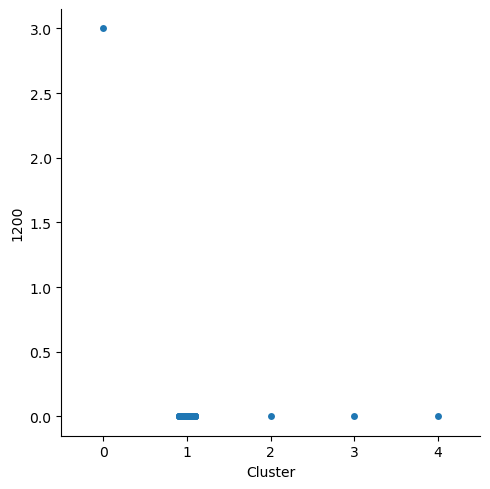

In [24]:
#Pick a random word to look at
word_index = 1200
#X[word_index].plot()
sns.catplot(data = X,x="Cluster",y=word_index)

Cluster 2 is the only cluster that has the word indexed 1200 in it, and it has it twice. Which word is 1200?
Worryingly, it appears most companies are in one cluster.

In [25]:
print(vectorizer.get_feature_names_out()[word_index])

Force


Adding the cluster back into the data frame

In [26]:
# Hopefully I haven' messed up the indices
about_data["Cluster_5"] = X['Cluster']

In [27]:
about_data.head(5)

,Symbol,Name,Website,AboutUs,AboutUsCleaned,Cluster_5
0,ACN,Accenture,https://www.accenture.com,JOIN US EXPLORE JOBS WHO WE ARE HOW WE'RE ORGA...,"[JOIN, US, EXPLORE, JOBS, ORGANIZED, US, Curre...",1
1,ATVI,Activision Blizzard,https://activisionblizzard.com/,About We connect and engage the world through ...,"[connect, engage, world, epic, entertainment, ...",1
2,AES,AES Corporation,http://aes.com,AES Global AES Local We’re integrating innovat...,"[AES, Global, AES, Local, We’re, integrating, ...",1
3,AFL,Aflac,http://aflac.com,Business owner? About Aflac Aflac is a Fortun...,"[Business, owner, Aflac, Aflac, Fortune, 500, ...",1
4,ALB,Albemarle Corporation,http://albemarle.com,"With a history that extends back to 1887, Alb...","[history, extends, back, 1887, Albemarle, humb...",1


# Visualize Results
One nice way to see the results of this are to make new word clouds from each of the categories we have made

In [28]:
About_Cluster_5_0 = about_data[about_data['Cluster_5']==0]

In [29]:
About_Cluster_5_0.head()

,Symbol,Name,Website,AboutUs,AboutUsCleaned,Cluster_5
46,FANG,Diamondback Energy,https://www.diamondbackenergy.com,Diamondback is an independent oil and natural ...,"[Diamondback, independent, oil, natural, gas, ...",0


In [30]:
# note that the AboutUsCleaned column has a list of words, already cleaned
About_Cluster_5_0_Text_List = About_Cluster_5_0["AboutUsCleaned"].tolist()

In [31]:
# to plug this into the word cloud
About_Cluster_5_0_Text = [item for sublist in About_Cluster_5_0_Text_List for item in sublist]
#print(About_Cluster_5_0_Text)
About_Cluster_5_0_Text = " ".join(About_Cluster_5_0_Text)
print(type(About_Cluster_5_0_Text))

<class 'str'>


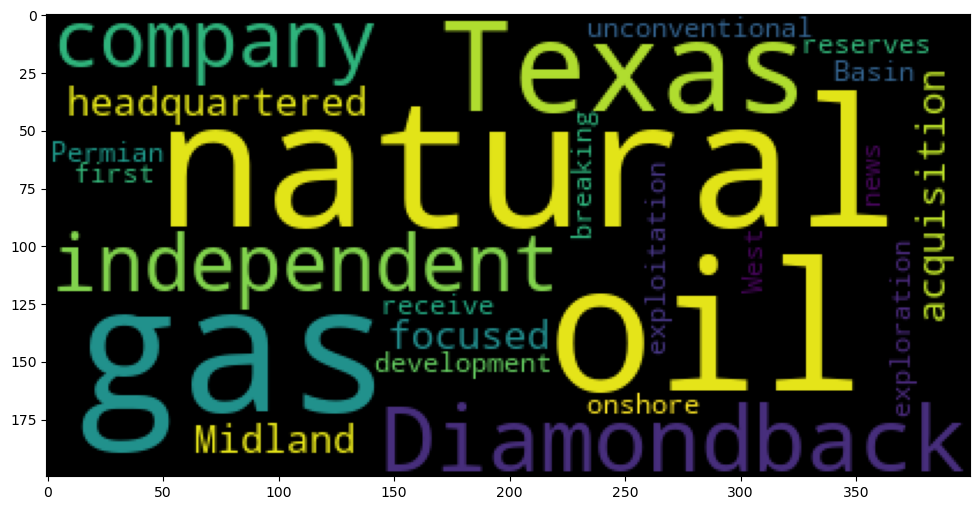

In [32]:
plt.figure(figsize=(12,6))
plt.imshow(WordCloud().generate(About_Cluster_5_0_Text))

It looks like this cluster's text is dominated by Disney's text.
Let's automate this for the k=5 clusters

Producing cloud for k=5 cluster 0
  string has length 233
Producing cloud for k=5 cluster 1
  string has length 151085
Producing cloud for k=5 cluster 2
  string has length 26280
Producing cloud for k=5 cluster 3
  string has length 2457
Producing cloud for k=5 cluster 4
  string has length 0
Empty String!


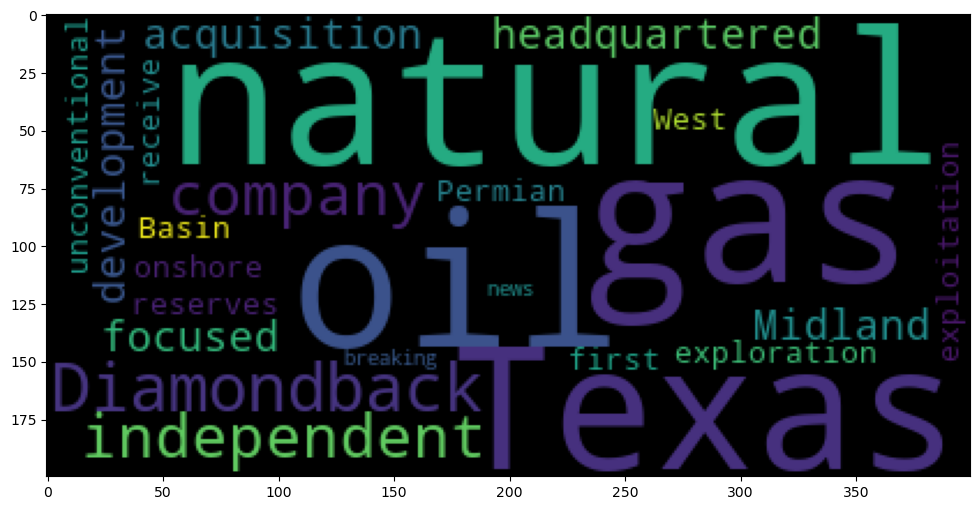

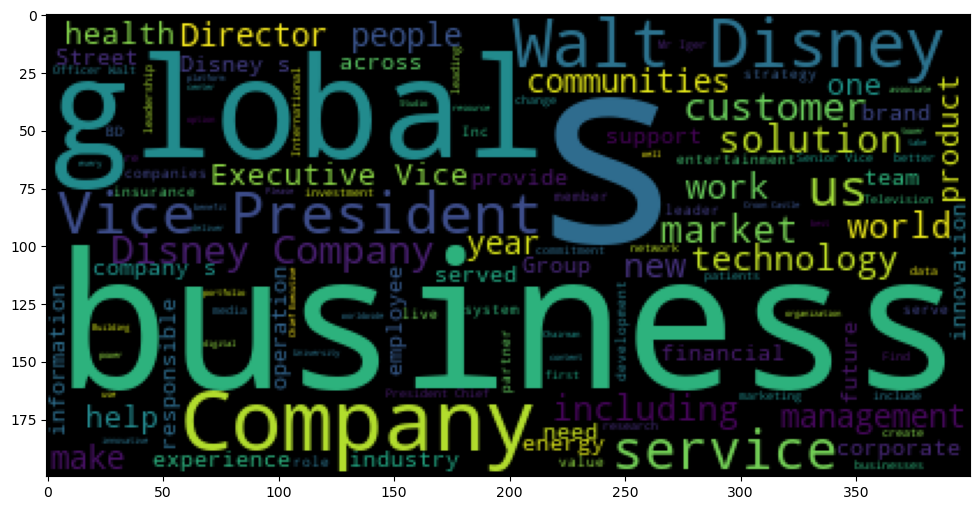

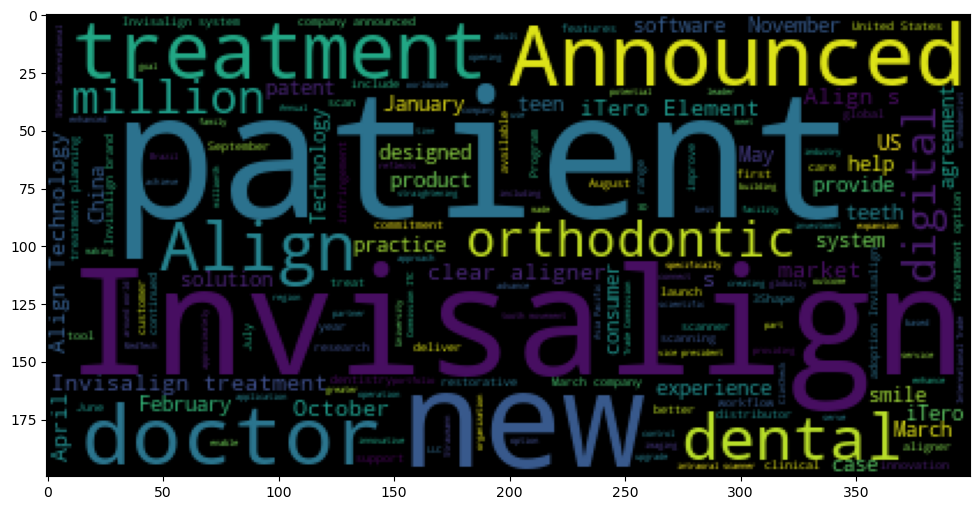

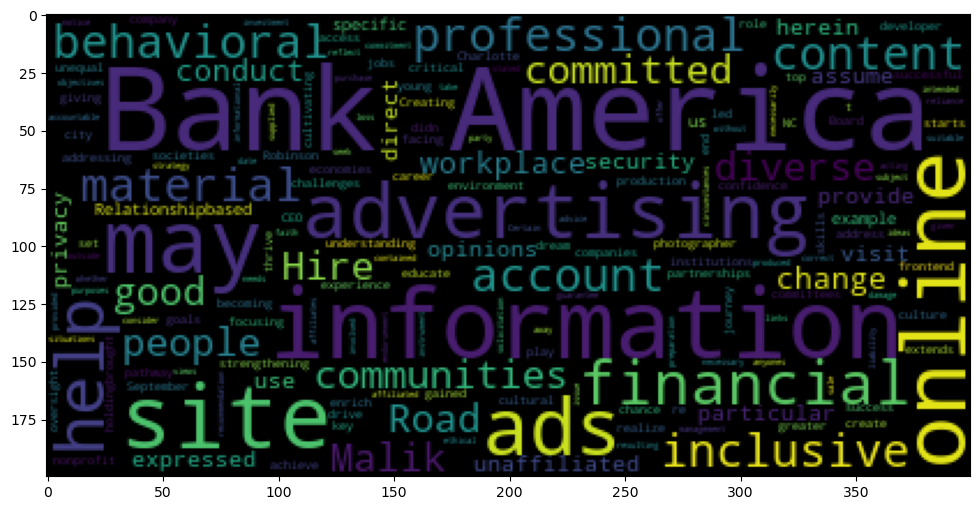

In [33]:
def PlotCloud_Cluster5(data):
    for i in range(0,5):
        print(f"Producing cloud for k=5 cluster {i}")
        About_Cluster_5_i = about_data[about_data['Cluster_5']==i]
        About_Cluster_5_i_Text_List = About_Cluster_5_i["AboutUsCleaned"].tolist()
        About_Cluster_5_i_Text = [item for sublist in About_Cluster_5_i_Text_List for item in sublist]
        About_Cluster_5_i_Text = " ".join(About_Cluster_5_i_Text)
        #plt.figure(figsize=(12,6))
        #plt.imshow(WordCloud().generate(About_Cluster_5_i_Text))
        len_str = len(About_Cluster_5_i_Text)
        print(f"  string has length {len(About_Cluster_5_i_Text)}")
        if len_str > 0:
            plt.figure(figsize=(12,6))
            plt.imshow(WordCloud().generate(About_Cluster_5_i_Text))
        else:
            print("Empty String!")
        
PlotCloud_Cluster5(about_data)

# Observations
I notice that these word clouds have many words that are clearly from specific companies (invisalign, enphase, diamondback). One issue could be that some companies keep repeating those unique words, which we are not necessarily interested in for the word cloud, for which our goal should be to understand what defines the cluster

Some ideas for addressing this:
1. flatten out the words: for each company in a cluster, remove repeats of words
2. remove words that are only present in one company

Option 1 might help balance out companies that have more about us text saved.

After some experimentation, I found that option 2 is safer for when one category has very few companies.

Producing cloud for k=5 cluster 0
  This cluster has 1 entries
Using filter option 1
<class 'str'>
  string has length 212
Producing cloud for k=5 cluster 1
  This cluster has 59 entries
Using filter option 1
<class 'str'>
  string has length 87040
Producing cloud for k=5 cluster 2
  This cluster has 1 entries
Using filter option 1
<class 'str'>
  string has length 10899
Producing cloud for k=5 cluster 3
  This cluster has 1 entries
Using filter option 1
<class 'str'>
  string has length 1881
Producing cloud for k=5 cluster 4
  This cluster has 0 entries
Using filter option 1
<class 'str'>
  string has length 0
Empty String!


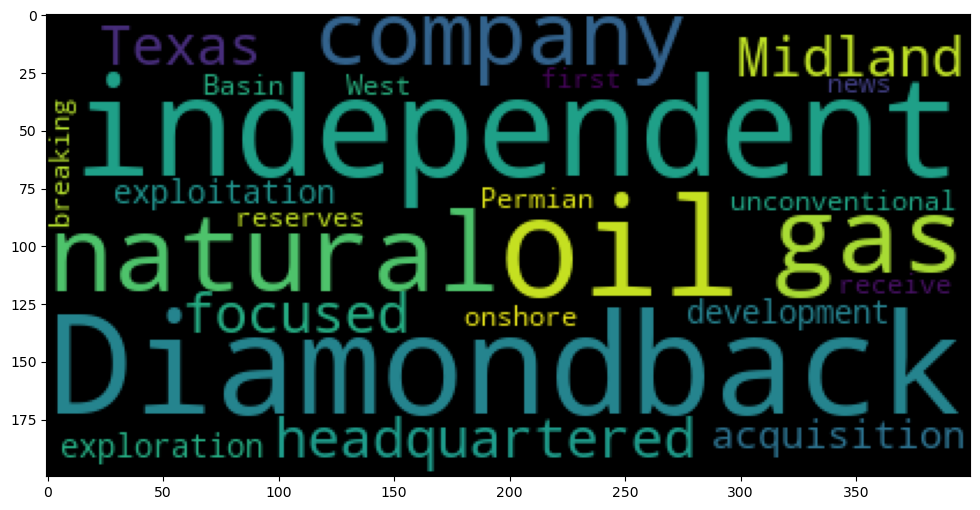

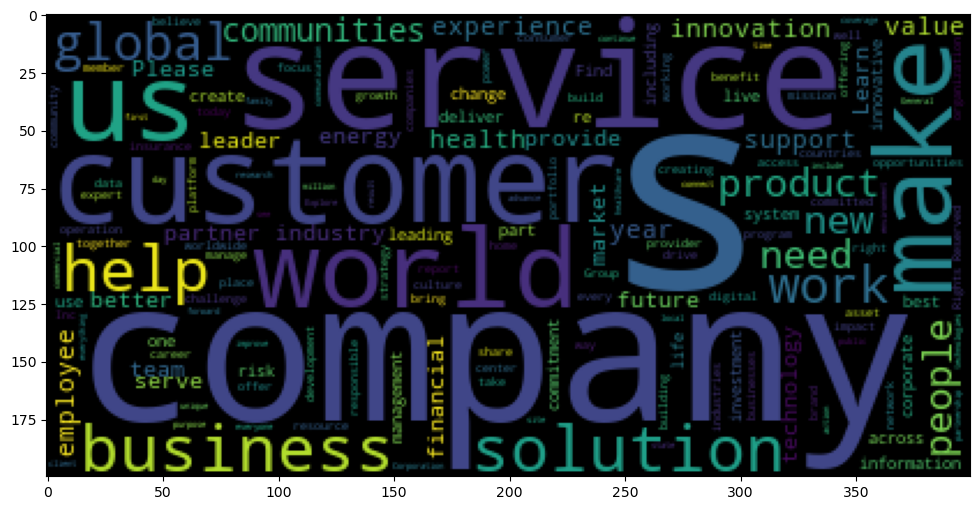

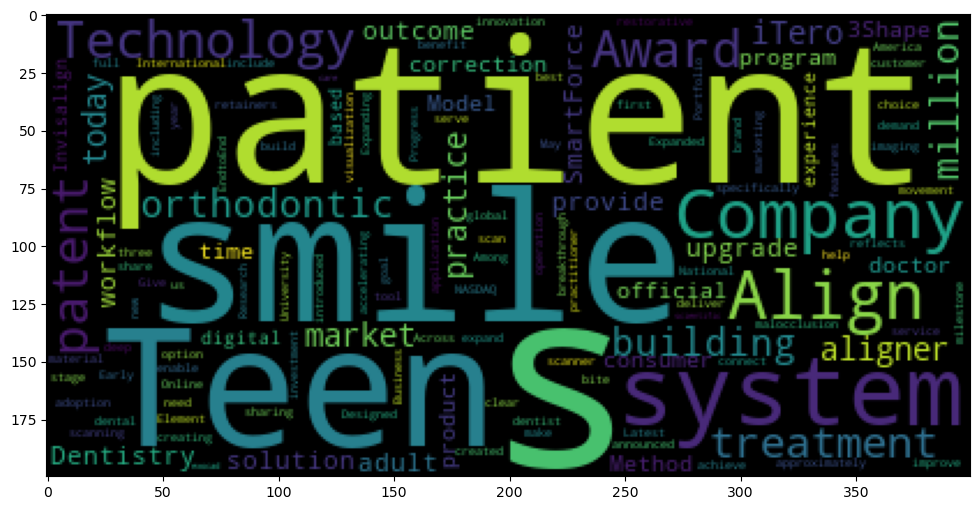

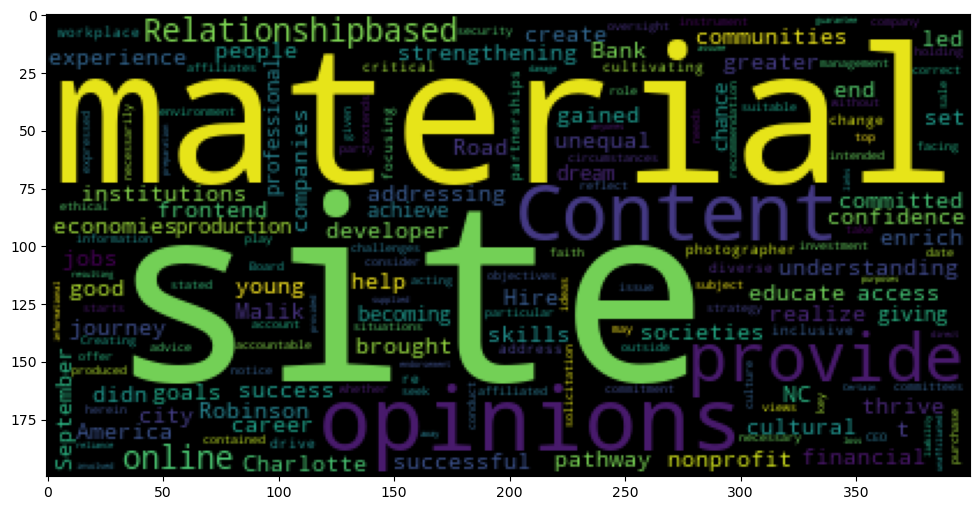

In [34]:
word_filter_option = 1

def PlotCloud_Cluster5_Improved(data):
    for i in range(0,5):
        print(f"Producing cloud for k=5 cluster {i}")
        About_Cluster_5_i = about_data[about_data['Cluster_5']==i]
        About_Cluster_5_i_Text_List = About_Cluster_5_i["AboutUsCleaned"].tolist()
        print(f"  This cluster has {len(About_Cluster_5_i_Text_List)} entries")
        About_Cluster_5_i_Text = ""
        # Option 1 remove repeats within companies
        if (word_filter_option == 1):
            print("Using filter option 1")
            for sublist in About_Cluster_5_i_Text_List:
                temp_list = [] # list for one company
                for item in sublist:
                    # avoid repeats
                    if not item in temp_list:
                        temp_list.append(item)
                for item in temp_list:
                    About_Cluster_5_i_Text += " " + item
        
        if (word_filter_option == 2):
            print("Using filter option 2")
            # Option 2 remove words unique to single companies
            n_unique = 0
            n_non_unique = 0
            for j in range(len(About_Cluster_5_i_Text_List)):
                sublist = About_Cluster_5_i_Text_List[j]
                for item in sublist:
                    item_is_unique=True
                    for k in range(len(About_Cluster_5_i_Text_List)):
                        if k == j: # avoid same company
                            continue
                        second_sublist = About_Cluster_5_i_Text_List[k]
                        if (item in second_sublist):
                            item_is_unique = False
                            n_non_unique += 1
                            break
                    if (not item_is_unique):
                        About_Cluster_5_i_Text += " " + item
                    else:
                        n_unique += 1
            print(f"Found {n_unique} unique words and {n_non_unique} non-unique words")
            #for sublist in About_Cluster_5_i_Text_List:
            #    for item in sublist:
                
        
        #About_Cluster_5_i_Text = [item for sublist in About_Cluster_5_i_Text_List for item in sublist]
        #About_Cluster_5_i_Text = " ".join(About_Cluster_5_i_Text)
        print(type(About_Cluster_5_i_Text))
        len_str = len(About_Cluster_5_i_Text)
        print(f"  string has length {len(About_Cluster_5_i_Text)}")
        if len_str > 0:
            plt.figure(figsize=(12,6))
            plt.imshow(WordCloud().generate(About_Cluster_5_i_Text))
        else:
            print("Empty String!")
        
        
PlotCloud_Cluster5_Improved(about_data)

# Varying the clustering

The two main things we should vary in the clustering are the initialization and the number of clusters ($k$).

We can vary n_init, which varies how many different random initializations are used. So, the results are probably not sensitive to changes in n_init around 10.

## Measurements
Can we measure the performance of the clustering? Some measure of the separation of the clusters?
For labeled data with a target variable to model, we would make a model using the cluster information, and evaluate that with each model.

We could look at the relative sizes of the clusters, and see how evenly they are distributed. I think the Gini coefficient or perhaps an entropy calculation would give a measurement of this.